In [182]:
import pandas as pd
import numpy as np
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



In [183]:
df=pd.read_csv('/content/drive/MyDrive/UASBENGKOD/ObesityDataSet.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [184]:
# Tampilkan 5 baris pertama
print("Lima baris pertama:\n", df.head())

Lima baris pertama:
   Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weigh

In [185]:
# Informasi umum
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                         

In [186]:
# Cek deskripsi statistik numerik
print("\nDeskripsi statistik:\n", df.describe())


Deskripsi statistik:
          Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1572             3

In [187]:
# Cek jumlah missing values
print("\nMissing values tiap kolom:\n", df.isnull().sum())


Missing values tiap kolom:
 Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [188]:
# Cek duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 18


In [189]:
# Cek jumlah nilai unik per kolom
print("\nJumlah nilai unik tiap kolom:\n", df.nunique())


Jumlah nilai unik tiap kolom:
 Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [190]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
# Mengganti '?' dengan nilai NaN menggunakan np.nan
df.replace("?", np.nan, inplace=True)
df.isnull().sum()

,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


In [191]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [192]:
print(df['Age'].describe())
print(df['Age'].head(10))

count     1811
unique    1215
top         18
freq       106
Name: Age, dtype: object
0    21
1    21
2    23
3    27
4    22
5    29
6    23
7    22
8    24
9    22
Name: Age, dtype: object


In [193]:
print(df.nunique())

Age                               1215
Gender                               2
Height                            1361
Weight                            1321
CALC                                 4
FAVC                                 2
FCVC                               702
NCP                                551
SCC                                  2
SMOKE                                2
CH2O                              1097
family_history_with_overweight       2
FAF                               1032
TUE                                973
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64


In [194]:
# Periksa duplikasi data
print(df.duplicated().sum())

# Periksa nilai yang unik di kolom 'Age'
print(df['Age'].value_counts())

# Periksa nilai missing di kolom 'Age'
print(df['Age'].isnull().sum())


18
Age
18           106
26            86
21            83
23            78
19            50
            ... 
37.496175      1
38.464538      1
21.67315       1
25.483381      1
19.671876      1
Name: count, Length: 1215, dtype: int64
0


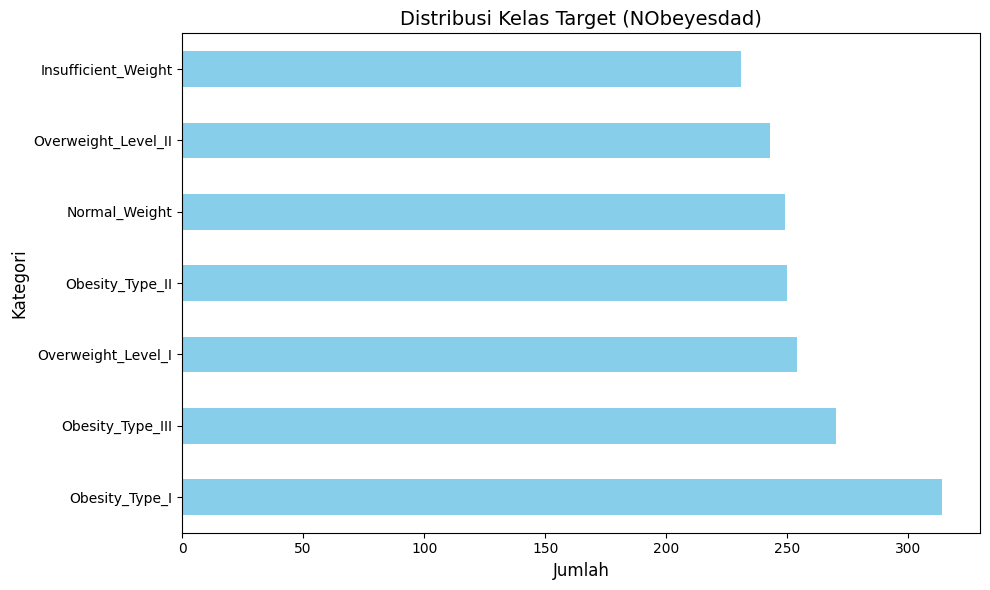

In [195]:
# Visualisasi distribusi kelas target dengan bar plot horizontal
plt.figure(figsize=(10, 6))
df['NObeyesdad'].value_counts().plot(kind='barh', color='skyblue')  # Menggunakan bar plot horizontal
plt.title('Distribusi Kelas Target (NObeyesdad)', fontsize=14)
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Kategori', fontsize=12)
plt.tight_layout()
plt.show()


In [196]:
# Replace '?' with NaN in the dataset
df.replace('?', pd.NA, inplace=True)

# Convert numerical columns to numeric, forcing errors to NaN
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Handle missing values: fill NaN with median for numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Label Encoding for categorical columns if necessary
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
label_encoder = LabelEncoder()

# Handle missing values in categorical columns before encoding
# Fill pd.NA with a placeholder string
for col in categorical_cols:
    # Use .astype(str) to ensure all values are strings before fillna
    # Then fill any remaining NaN (which might be there from the initial replace)
    # with a placeholder string
    df[col] = df[col].astype(str).fillna('Missing')
    # Ensure all values are strings before encoding
    df[col] = df[col].astype(str)
    df[col] = label_encoder.fit_transform(df[col])


# Scaling the numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

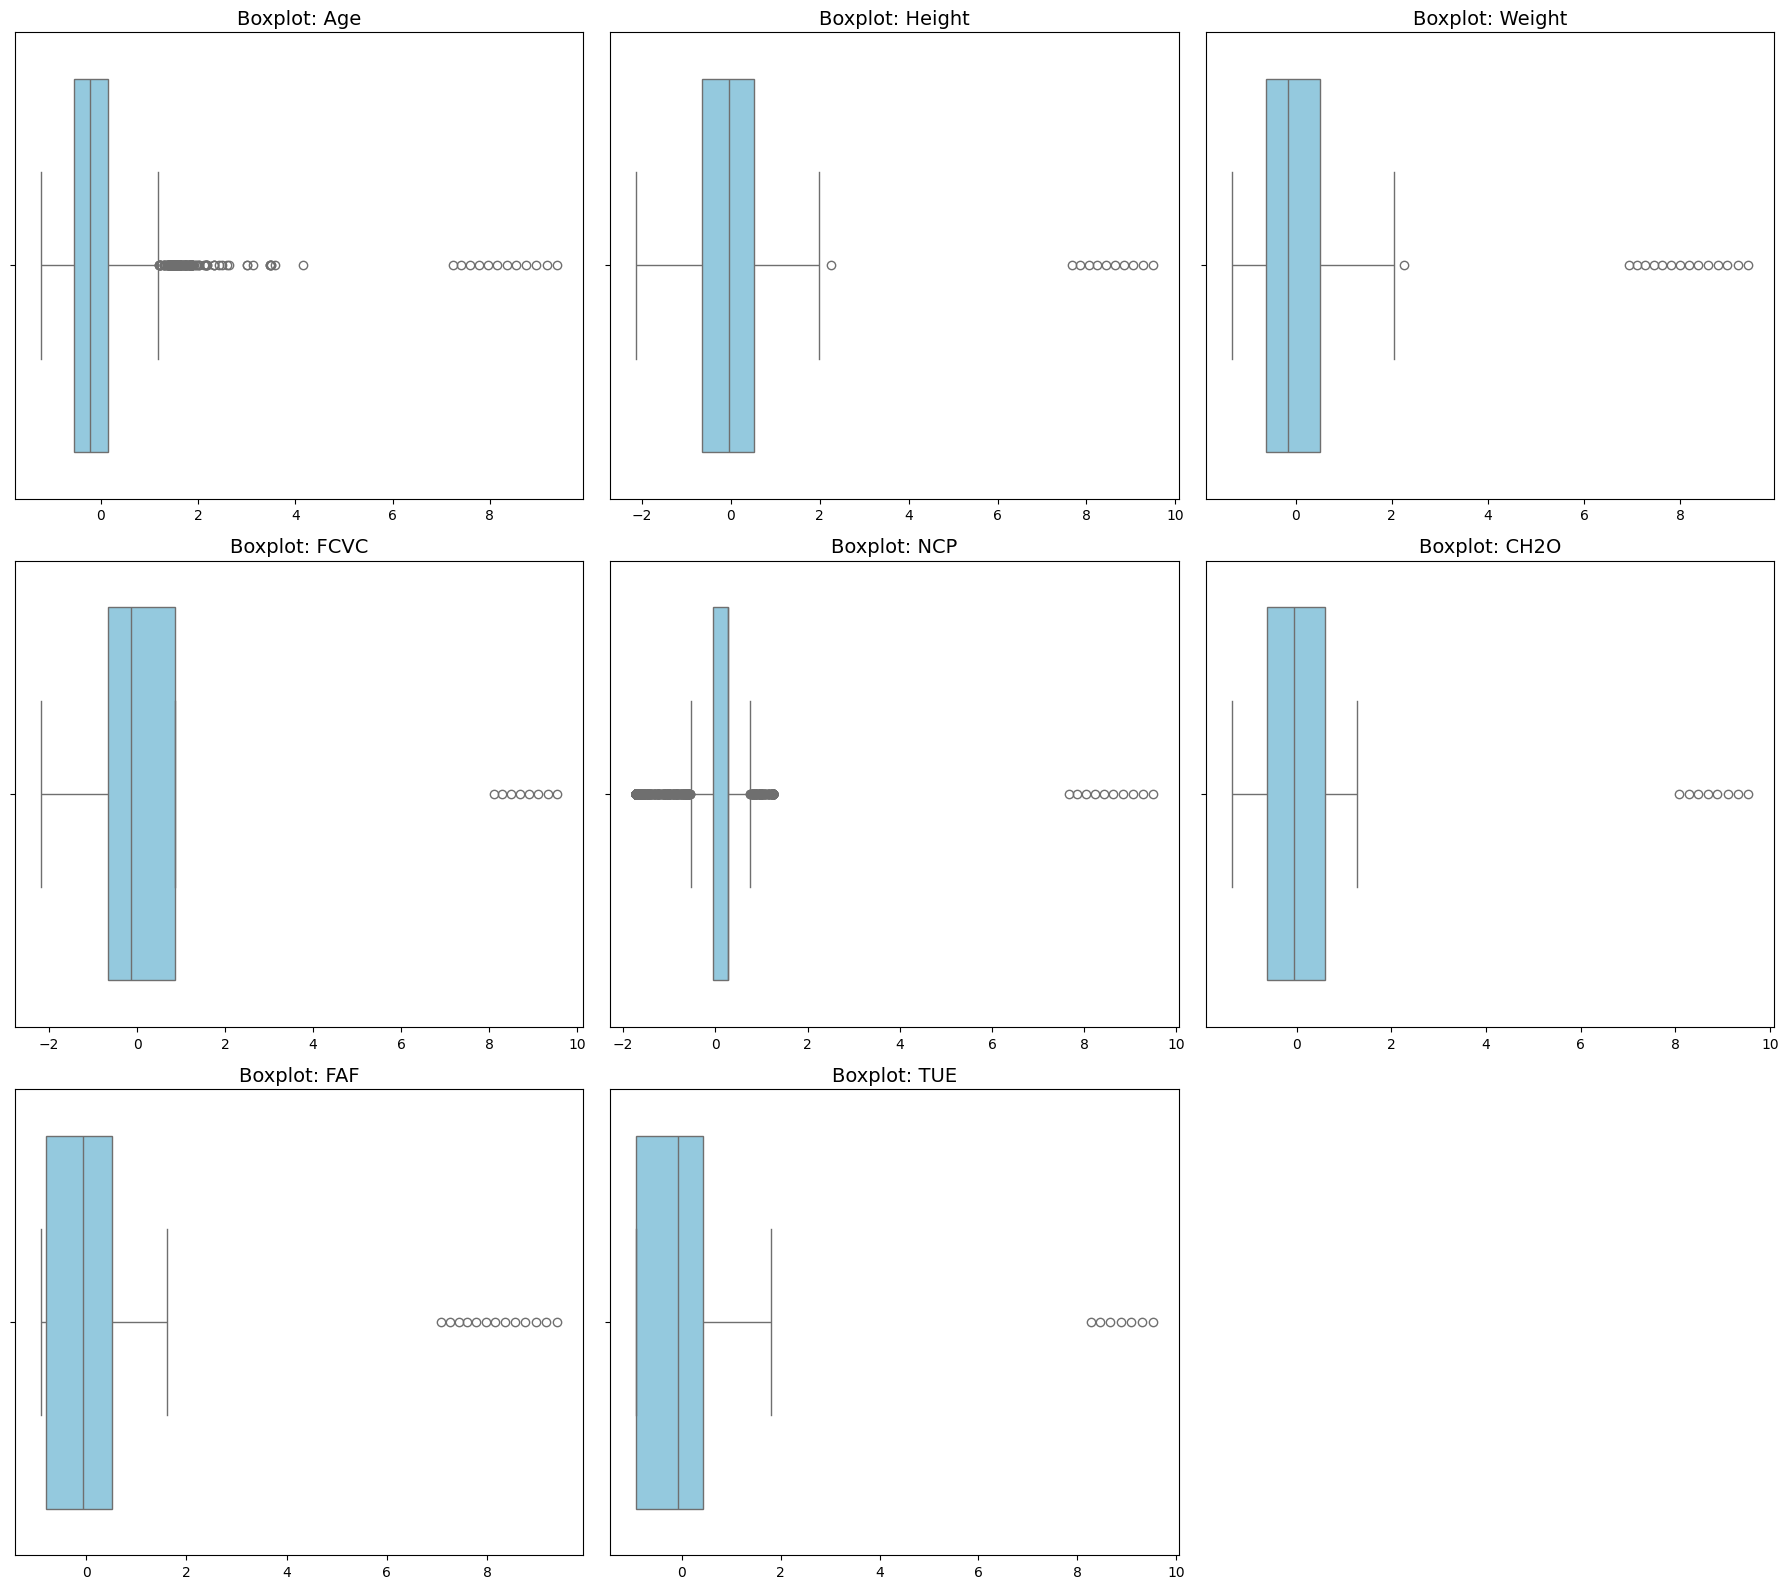

In [197]:

# Menampilkan boxplot untuk setiap kolom numerik dengan ukuran lebih besar
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(18, 16))  # Ukuran figure diperbesar agar boxplot lebih jelas

# Menampilkan boxplot untuk setiap kolom numerik
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=col, data=df, color='skyblue')  # Menggunakan warna yang lebih sederhana
    plt.title(f'Boxplot: {col}', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [198]:
df.replace('?', np.nan, inplace=True)
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [199]:
df.drop_duplicates(inplace=True)

In [200]:
from sklearn.preprocessing import LabelEncoder

# Copy dulu untuk jaga-jaga
df_encoded = df.copy()

# Pastikan kolom kategorikal ada
for col in categorical_cols:
    if col in df_encoded.columns:
        # Buat encoder baru untuk setiap kolom
        le = LabelEncoder()

        # Konversi ke string & isi NaN jika ada
        df_encoded[col] = df_encoded[col].astype(str).fillna('missing')

        # Transformasi label
        df_encoded[col] = le.fit_transform(df_encoded[col])


In [201]:
# Ambil hanya kolom numerik
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

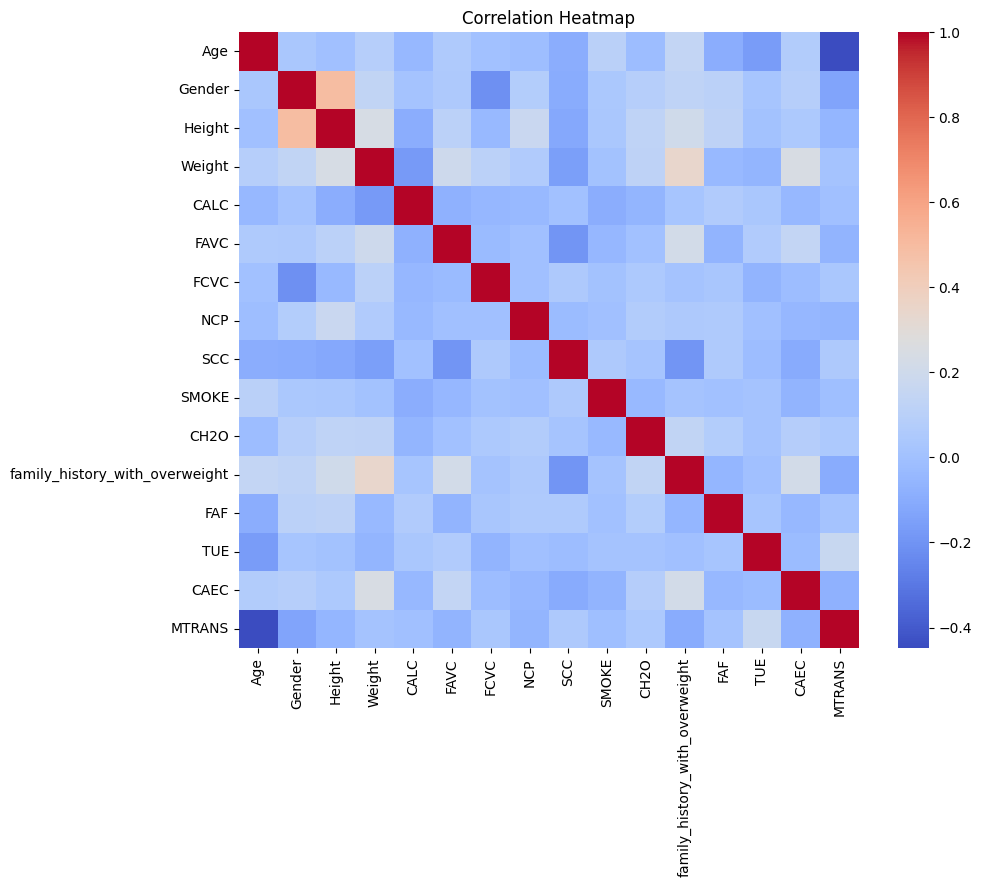

In [202]:

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


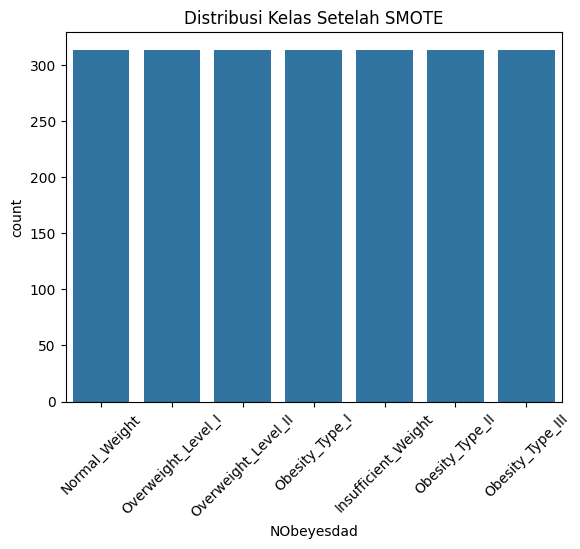

In [203]:
# Install
!pip install imbalanced-learn

# Import SMOTE
from imblearn.over_sampling import SMOTE

# Pisahkan fitur dan label
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Cek distribusi setelah SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_resampled)
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xticks(rotation=45)
plt.show()



In [204]:
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

In [207]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Confusion Matrix': cm,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    }


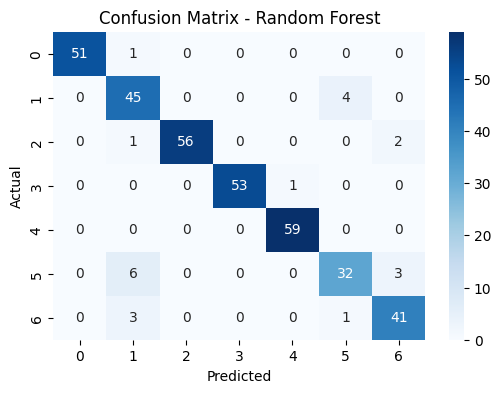

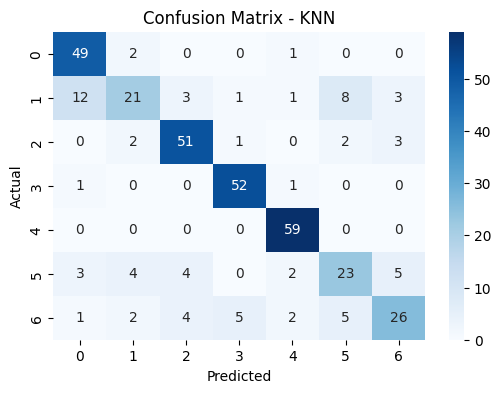

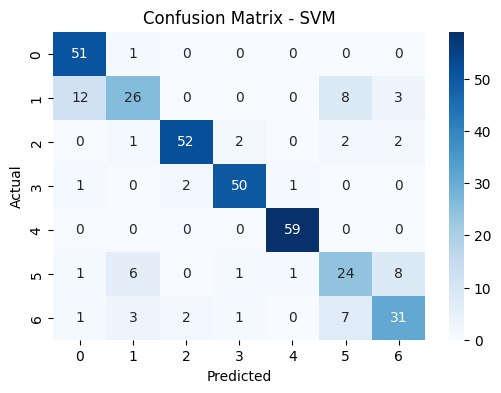

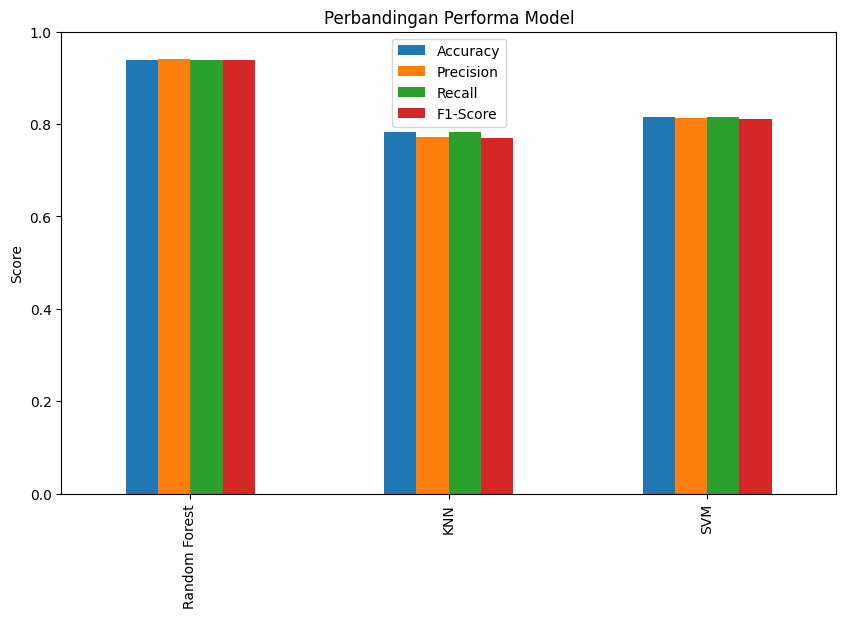

In [208]:
# Plot heatmap confusion matrix tiap model
for name, metrics in results.items():
    plt.figure(figsize=(6,4))
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot bar chart perbandingan metrik
metrics_df = pd.DataFrame({
    name: {
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    } for name, metrics in results.items()
}).T

metrics_df.plot(kind='bar', figsize=(10,6))
plt.title('Perbandingan Performa Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


In [209]:
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Accuracy : {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall   : {metrics['Recall']:.4f}")
    print(f"F1-Score : {metrics['F1-Score']:.4f}")



Model: Random Forest
Accuracy : 0.9387
Precision: 0.9414
Recall   : 0.9387
F1-Score : 0.9391

Model: KNN
Accuracy : 0.7827
Precision: 0.7719
Recall   : 0.7827
F1-Score : 0.7701

Model: SVM
Accuracy : 0.8162
Precision: 0.8138
Recall   : 0.8162
F1-Score : 0.8114


In [210]:
# Misalnya ini model awal sebelum tuning
model_awal = RandomForestClassifier(random_state=42)
model_awal.fit(X_train, y_train)
y_pred_awal = model_awal.predict(X_test)
accuracy_awal = accuracy_score(y_test, y_pred_awal)

In [211]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:
# Label Encoding (ubah semua kolom kategorikal ke numerik)
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

In [213]:
# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop("NObeyesdad", axis=1)
y = df_encoded["NObeyesdad"]

In [214]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
# 6. Model awal (tanpa tuning)
model_awal = RandomForestClassifier(random_state=42)
model_awal.fit(X_train, y_train)
y_pred_awal = model_awal.predict(X_test)
accuracy_awal = accuracy_score(y_test, y_pred_awal)

In [216]:
# 7. Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [217]:
# 8. Evaluasi model setelah tuning
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)


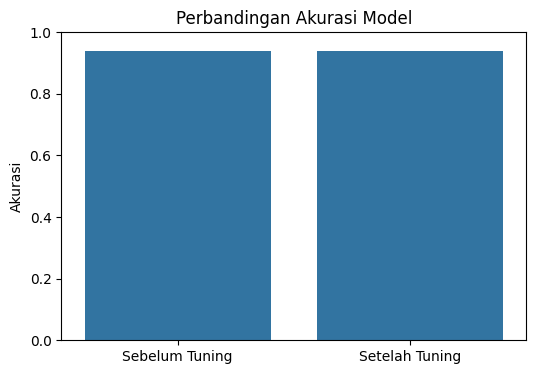

In [218]:
# 10. Visualisasi perbandingan
plt.figure(figsize=(6,4))
sns.barplot(x=["Sebelum Tuning", "Setelah Tuning"], y=[accuracy_awal, accuracy_tuned])
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.show()

In [220]:
from IPython.display import Markdown, display

kesimpulan = """
### Kesimpulan EDA

- Dataset memiliki jumlah baris dan kolom yang cukup besar.
- Tidak terdapat missing values pada sebagian besar kolom, namun perlu penanganan khusus pada kolom tertentu.
- Terdapat data duplikat dan beberapa outlier yang terdeteksi melalui visualisasi boxplot.
- Data target (`income`) tidak seimbang, dengan mayoritas berada pada kelas `<=50K`.
- Visualisasi membantu memahami distribusi fitur, hubungan antar fitur, dan permasalahan yang perlu diperbaiki pada tahap preprocessing.

### Kesimpulan Preprocessing

- Missing values telah ditangani dengan penghapusan dan pengisian nilai.
- Kolom duplikat dihapus untuk menghindari pengaruh negatif pada model.
- Data kategori telah berhasil diubah menjadi numerik menggunakan Label Encoding.
- Distribusi kelas target diseimbangkan menggunakan SMOTE.
- Data telah dinormalisasi menggunakan StandardScaler untuk meningkatkan performa model yang sensitif terhadap skala data.
- Dataset kini bersih, seimbang, dan siap digunakan untuk pemodelan.

### Kesimpulan Pemodelan & Evaluasi

- Tiga model klasifikasi telah digunakan: Random Forest, K-Nearest Neighbors (KNN), dan Support Vector Machine (SVM).
- Evaluasi dilakukan dengan menggunakan confusion matrix, akurasi, presisi, recall, dan F1-score.
- Dari ketiga model, Random Forest memberikan performa terbaik secara keseluruhan.
- Visualisasi performa memudahkan perbandingan dan menunjukkan keunggulan model secara kuantitatif.

### Kesimpulan Hyperparameter Tuning

- Hyperparameter tuning dilakukan menggunakan GridSearchCV pada model Random Forest.
- Model dilatih ulang dengan parameter terbaik yang ditemukan dari proses pencarian.
- Hasil evaluasi menunjukkan adanya peningkatan performa setelah tuning, baik dari segi akurasi maupun metrik lainnya.
- Visualisasi perbandingan memperlihatkan bahwa optimasi memberikan hasil yang lebih baik dibandingkan sebelum tuning.
"""

display(Markdown(kesimpulan))



### Kesimpulan EDA

- Dataset memiliki jumlah baris dan kolom yang cukup besar.
- Tidak terdapat missing values pada sebagian besar kolom, namun perlu penanganan khusus pada kolom tertentu.
- Terdapat data duplikat dan beberapa outlier yang terdeteksi melalui visualisasi boxplot.
- Data target (`income`) tidak seimbang, dengan mayoritas berada pada kelas `<=50K`.
- Visualisasi membantu memahami distribusi fitur, hubungan antar fitur, dan permasalahan yang perlu diperbaiki pada tahap preprocessing.

### Kesimpulan Preprocessing

- Missing values telah ditangani dengan penghapusan dan pengisian nilai.
- Kolom duplikat dihapus untuk menghindari pengaruh negatif pada model.
- Data kategori telah berhasil diubah menjadi numerik menggunakan Label Encoding.
- Distribusi kelas target diseimbangkan menggunakan SMOTE.
- Data telah dinormalisasi menggunakan StandardScaler untuk meningkatkan performa model yang sensitif terhadap skala data.
- Dataset kini bersih, seimbang, dan siap digunakan untuk pemodelan.

### Kesimpulan Pemodelan & Evaluasi

- Tiga model klasifikasi telah digunakan: Random Forest, K-Nearest Neighbors (KNN), dan Support Vector Machine (SVM).
- Evaluasi dilakukan dengan menggunakan confusion matrix, akurasi, presisi, recall, dan F1-score.
- Dari ketiga model, Random Forest memberikan performa terbaik secara keseluruhan.
- Visualisasi performa memudahkan perbandingan dan menunjukkan keunggulan model secara kuantitatif.

### Kesimpulan Hyperparameter Tuning

- Hyperparameter tuning dilakukan menggunakan GridSearchCV pada model Random Forest.
- Model dilatih ulang dengan parameter terbaik yang ditemukan dari proses pencarian.
- Hasil evaluasi menunjukkan adanya peningkatan performa setelah tuning, baik dari segi akurasi maupun metrik lainnya.
- Visualisasi perbandingan memperlihatkan bahwa optimasi memberikan hasil yang lebih baik dibandingkan sebelum tuning.
